In [1]:
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [2]:
ground_truth = 'ai4mi_project/data/segthor_train/train/Patient_27/GT2.nii.gz'
prediction = 'ai4mi_project/data/segthor_train/train/Patient_67.nii.gz'
patient = 'ai4mi_project/data/segthor_train/train/Patient_27/Patient_27.nii.gz'

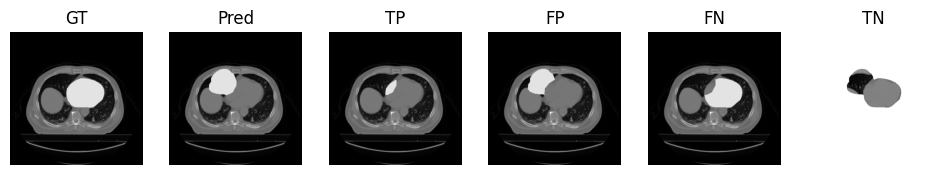

In [7]:
def show_slices(slices, titles=None):
    fig, axes = plt.subplots(1, len(slices))
    fig.set_size_inches(12, 4)
    for i, slice in enumerate(slices):
        axes[i].imshow(slice, cmap="gray")
        axes[i].axis('off') 
        if titles:
            axes[i].set_title(titles[i])
    plt.show()

def visualize_confusion(gt_path, pred_path, pt_path, label=2, slice_idx=85):
    
    gt_image = sitk.ReadImage(gt_path)
    pred_image = sitk.ReadImage(pred_path)
    pt_image = sitk.ReadImage(pt_path)

    gt_array = sitk.GetArrayFromImage(gt_image)
    pred_array = sitk.GetArrayFromImage(pred_image)
    pt_array = sitk.GetArrayFromImage(pt_image)

    gt_array_filtered = (gt_array == label).astype(int)
    pred_array_filtered = (pred_array == label*63).astype(int)

    TP = (gt_array_filtered == 1) & (pred_array_filtered == 1)  
    TN = (gt_array_filtered != 1) & (pred_array_filtered != 1)  
    FP = (gt_array_filtered != 1) & (pred_array_filtered == 1)  
    FN = (gt_array_filtered == 1) & (pred_array_filtered != 1)

    background = pt_array[slice_idx]

    gt_slice = background.copy()
    gt_slice[gt_array_filtered[slice_idx] == 1] = 1000
    
    pred_slice = background.copy()
    pred_slice[pred_array_filtered[slice_idx] == 1] = 1000
    
    tp_slice = background.copy()
    tp_slice[TP[slice_idx] == 1] = 1000
    
    fp_slice = background.copy()
    fp_slice[FP[slice_idx] == 1] = 1000
    
    fn_slice = background.copy()
    fn_slice[FN[slice_idx] == 1] = 1000
    
    tn_slice = background.copy()
    tn_slice[TN[slice_idx] == 1] = 1000

    show_slices([gt_slice, pred_slice, tp_slice, fp_slice, fn_slice, tn_slice],
                titles=["GT", "Pred", "TP", "FP", "FN", "TN"])

visualize_confusion(ground_truth, prediction, patient, label=2)